<a href="https://colab.research.google.com/github/Shrinjoymaiti/pycourse/blob/master/lecture_4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E1
Color NPHI-Depth plot based on GR range using any python visualization library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
log_info=pd.read_csv('https://raw.githubusercontent.com/Energy-AI/basic_course/master/Lecture_3/data/log_data_csv.csv?token=AQTTZ5EOTFDVB2BIEG2AZK27M4R4I')
log_info.head()

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NBGRCFM,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Gamma Ray Scale')

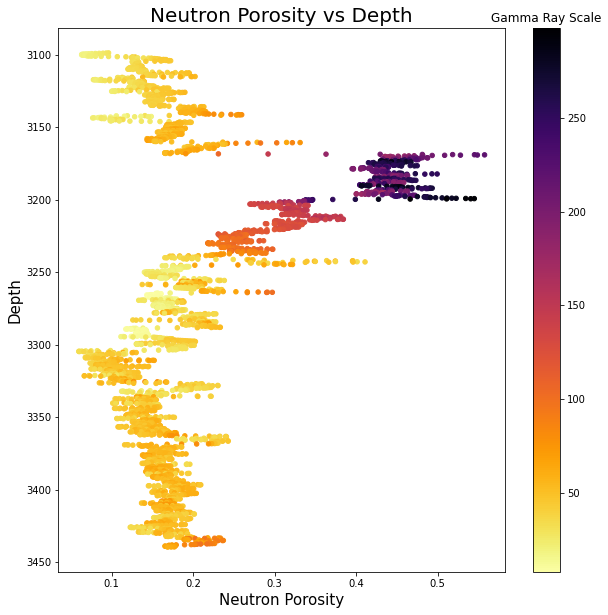

In [ ]:
#Plotting Neutron Porosity vs Depth based on Gamma Ray range
plt.figure(figsize=(10,10))
plt.scatter(x=log_info['NPHI'],y=log_info['DEPTH'], s=20, c=log_info['GR'], cmap='inferno_r')
plt.xlabel('Neutron Porosity', fontsize=15)
plt.ylabel('Depth', fontsize=15)
plt.title("Neutron Porosity vs Depth", fontsize=20)
plt.gca().invert_yaxis()
c=plt.colorbar()
c.ax.set_title('Gamma Ray Scale')


# E2
Create a new column in log data called 'lithology' based on Gamma Ray range. More than 75 - Shale. Less thna 75 - Sandstone. Keep in mind these range is just for learning purpose. This rule doesnt apply everytime.

Assign values 'SANDSTONE' and 'SHALE' based on the above mentioned Gamma-Ray Range

Create Scatter Plot of Neutron Density color coded by litholy column (categorical color plot)

In [ ]:
log_info['lithology']=np.where(log_info['GR']>75, 'Shale','Sandstone')
log_info

,DEPTH,ABDCQF01,ABDCQF02,ABDCQF03,ABDCQF04,BS,CALI,DRHO,DT,DTS,GR,NBGRCFM,NPHI,PEF,RACEHM,RACELM,RD,RHOB,RM,ROP,RPCEHM,RPCELM,RT,lithology
0,145.9,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
1,146.0,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
2,146.1,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
3,146.2,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
4,146.3,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sandstone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33186,3464.5,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9836,NaN,NaN,NaN,Sandstone
33187,3464.6,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9767,NaN,NaN,NaN,Sandstone
33188,3464.7,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9699,NaN,NaN,NaN,Sandstone
33189,3464.8,NaN,NaN,NaN,NaN,8.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29.9903,NaN,NaN,NaN,Sandstone


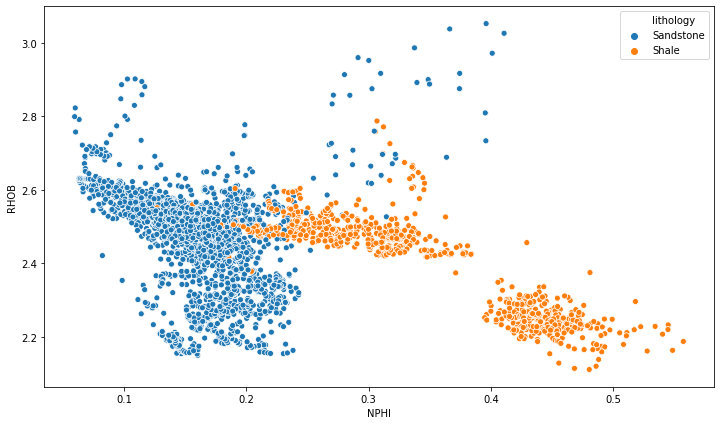

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,7))
sns.scatterplot(x='NPHI',y='RHOB',hue='lithology',data=log_info)

# E3
Create a Cateogrical Scatter Plot and Categorical Box Plot using Seaborn Library based on lithology and different properties like GR; RHOB on y axis.

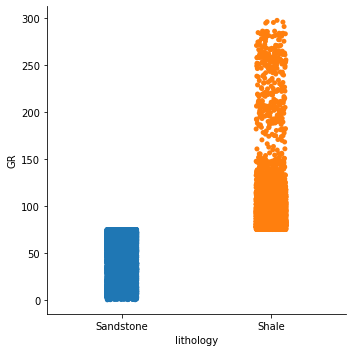

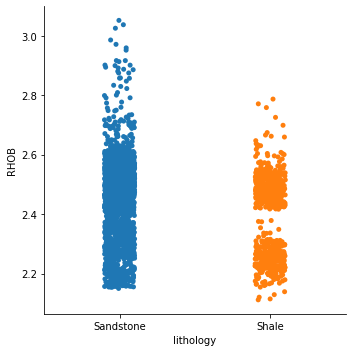

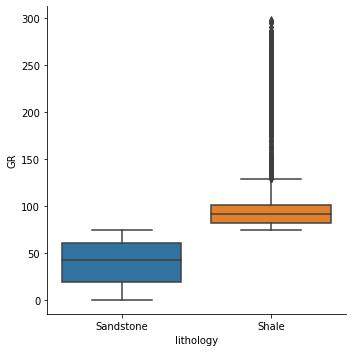

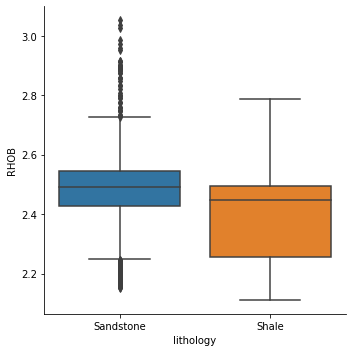

In [ ]:
import seaborn as sns
sns.catplot(x='lithology',y='GR',data=log_info)
sns.catplot(x='lithology',y='RHOB',data=log_info)
sns.catplot(x='lithology',y='GR',kind='box',data=log_info)
sns.catplot(x='lithology',y='RHOB',kind='box',data=log_info)

# E4
Create a Box plot using Seaborn Library based on lithology and different properties like GR; RHOB on y axis.

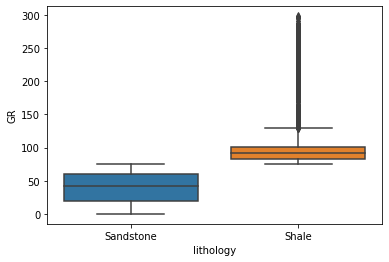

In [ ]:
sns.boxplot(x='lithology',y='GR',data=log_info)

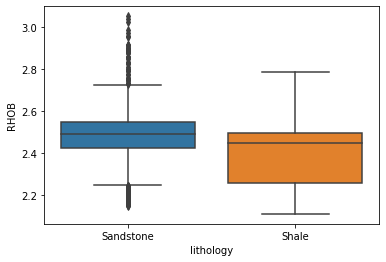

In [ ]:
sns.boxplot(x='lithology',y='RHOB',data=log_info)

# E5
Create histogram of ROP values based on categorical data of lithology column using plotly library in one figure (Use different bin size between 20-50)

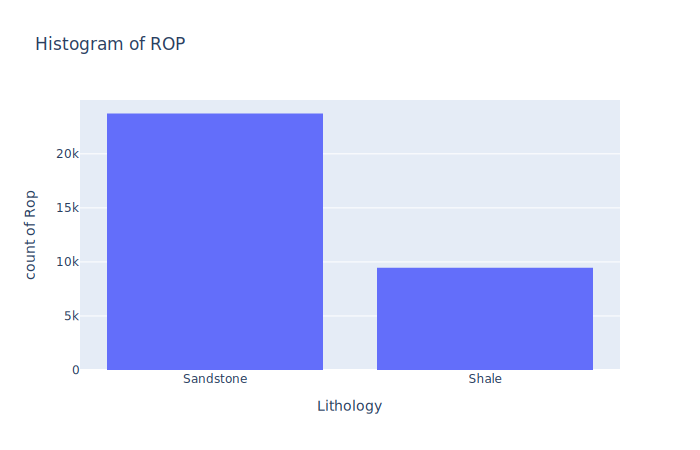

In [24]:
import plotly.express as pk
fig=pk.histogram(log_info,x='lithology',y='ROP',nbins=25,
                 labels={'lithology':'Lithology','ROP':'Rop'},title='Histogram of ROP')
fig.show('svg')

# E6
Import the Production Data and plot Average Choke Size and Average Annulus pressure proerties wrt time in the same plot.

In [25]:
df=pd.read_csv('https://raw.githubusercontent.com/Energy-AI/basic_course/master/Lecture_3/data/prod_data.csv?token=AQTTZ5DJNBGW5CO6D5LBDAS7M4UHS')
df.head()

,Unnamed: 0,DATEPRD,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_CHOKE_UOM,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL,FLOW_KIND,WELL_TYPE
0,0,2014-04-07,0.00000,0.00000,0.00000,0.0,0.000000,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,WI
1,1,2014-04-08,NaN,NaN,NaN,0.0,1.003059,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
2,2,2014-04-09,NaN,NaN,NaN,0.0,0.979008,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
3,3,2014-04-10,NaN,NaN,NaN,0.0,0.545759,%,0.00000,0.00000,0.00000,0.0,0.0,0.0,NaN,production,OP
4,4,2014-04-11,310.37614,96.87589,277.27826,0.0,1.215987,%,33.09788,10.47992,33.07195,0.0,0.0,0.0,NaN,production,OP


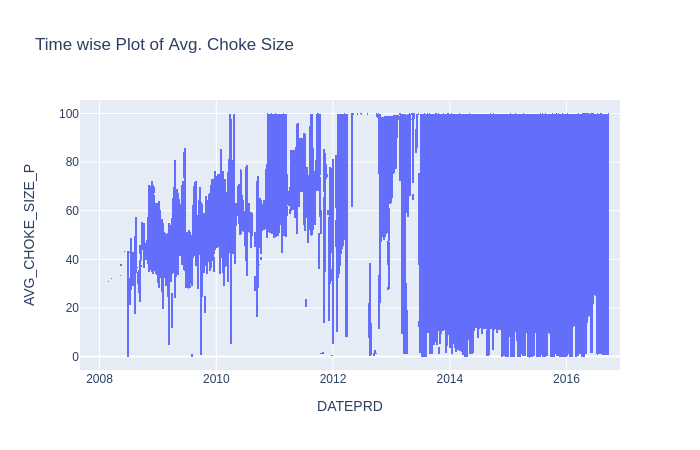

In [31]:
fig=pk.line(df.sort_values(by='DATEPRD'),x='DATEPRD',y='AVG_CHOKE_SIZE_P',title='Time wise Plot of Avg. Choke Size',width=1200,height=1200)
fig.show('png')

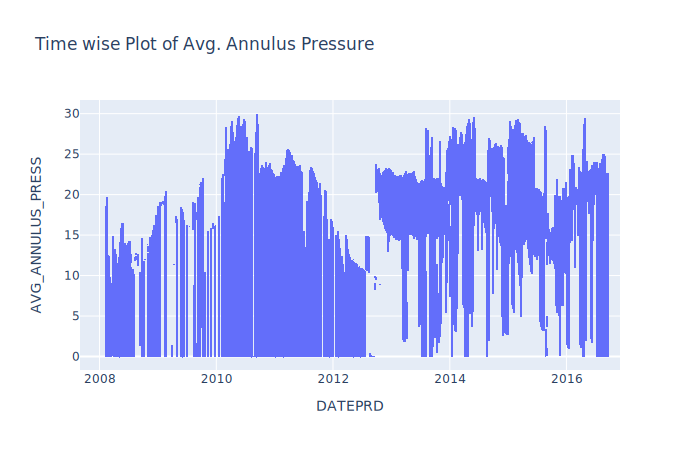

In [32]:
fig=pk.line(df.sort_values(by='DATEPRD'),x='DATEPRD',y='AVG_ANNULUS_PRESS',title='Time wise Plot of Avg. Annulus Pressure')
fig.show('svg')